# Predicting Popular Searches on EDGAR

In [1]:
#Setting up the environment: Sparking. How many instances?
#How to feed the data?

In [74]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.read_csv('test.txt')

In [63]:
df['datetime'] = df['date'] + ' ' + df['time']

In [64]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677600 entries, 0 to 23677599
Data columns (total 4 columns):
date         object
time         object
accession    object
datetime     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 722.6+ MB


In [78]:
dfhour = df.groupby(df['datetime'].dt.hour).count()

In [84]:
x = np.arange(24)

In [85]:
y = dfhour['accession']

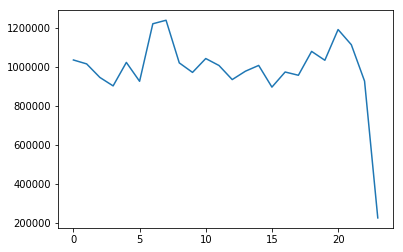

In [86]:
plt.plot(x,y)

In [96]:
df_11 = pd.read_csv('test11.txt')

In [97]:
df_11['datetime'] = df_11['date'] + ' ' + df_11['time']

In [98]:
df_11['datetime'] = pd.to_datetime(df_11['datetime'])

In [99]:
dfhour_11 = df_11.groupby(df_11['datetime'].dt.hour).count()

In [100]:
y_11 = dfhour_11['accession']

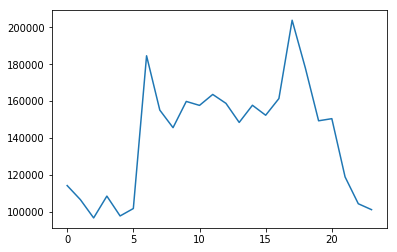

In [101]:
plt.plot(x,y_11)

In [104]:
df_docs = df.groupby('accession').count().sort_values('time')

In [108]:
df_docs = df_docs.drop(['date','time'],axis=1)

In [112]:
len(df_docs['datetime'].unique())

2349

In [135]:
df_docs[-1000::]

,datetime
accession,
0001437749-17-012078,1672
0001374913-17-000003,1672
0001193125-17-218754,1672
0000902664-17-002768,1673
0001437749-17-012081,1673
...,...
0001193125-17-218506,54601
0001193125-17-218511,56296
0001642247-17-000017,73535


In [136]:
y_d = df_docs['datetime']
y_d

accession
0001001288-10-000006         1
0000950123-14-004854         1
0001144204-12-000810         1
0001144204-12-000822         1
0000950123-14-004791         1
                         ...  
0001193125-17-218506     54601
0001193125-17-218511     56296
0001642247-17-000017     73535
0001642247-17-000016     74481
0001576429-14-000002    190765
Name: datetime, Length: 4730039, dtype: int64

In [138]:
x_d = np.arange(df_docs.shape[0])
x_d

array([      0,       1,       2, ..., 4730036, 4730037, 4730038])